## 3.5
### Question 1

In [3]:
install.packages('gvlma')
library(gvlma)

Installing package into ‘/home/nizhikebinesi/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [4]:
data <- read.csv('https://stepic.org/media/attachments/lesson/12088/homosc.csv')

In [5]:
gvlma(DV ~ IV, data = data)


Call:
lm(formula = DV ~ IV, data = data)

Coefficients:
(Intercept)           IV  
     3.7871       0.2662  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = DV ~ IV, data = data) 

                     Value  p-value                   Decision
Global Stat        13.4206 0.009393 Assumptions NOT satisfied!
Skewness            5.3467 0.020762 Assumptions NOT satisfied!
Kurtosis            3.8634 0.049351 Assumptions NOT satisfied!
Link Function       0.1553 0.693511    Assumptions acceptable.
Heteroscedasticity  4.0553 0.044034 Assumptions NOT satisfied!

### Task 1

In [6]:
fit <- lm(mpg ~ disp, mtcars)

In [37]:
library(ggplot2)

resid.norm <- function(fit) {
    alpha <- 0.05

    res <- shapiro.test(fit$residuals)
    color <- ifelse(res$p.value < alpha, 'red', 'green')

    df <- data.frame(fit$residuals)
    
    return (ggplot(df, aes(fit.residuals)) +
        geom_histogram(bins = 50, fill = color))
}

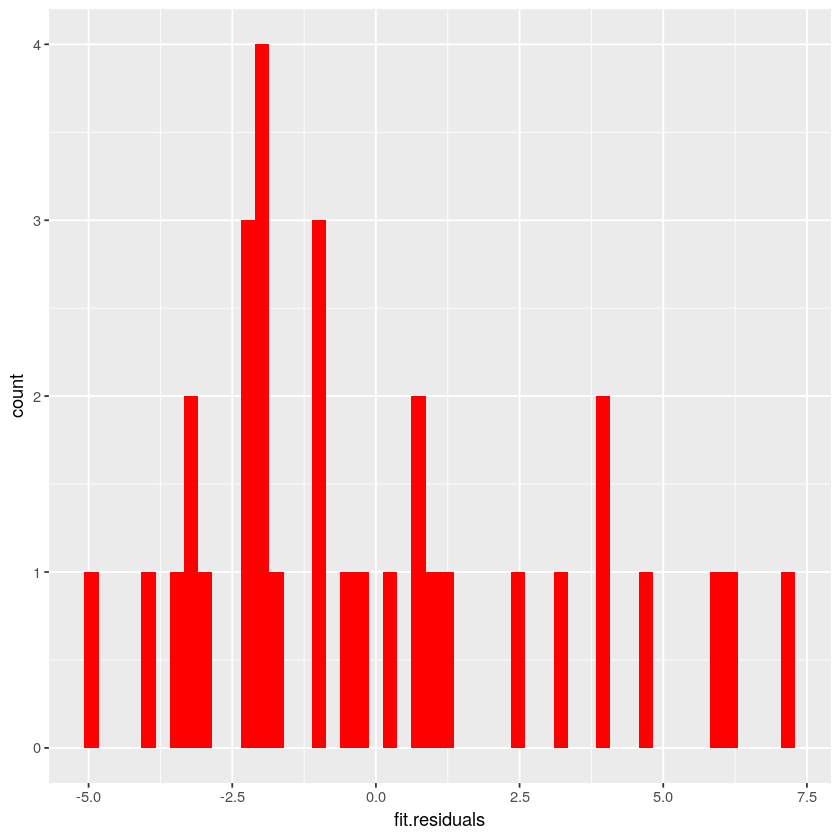

In [38]:
resid.norm(fit)

### Task 2

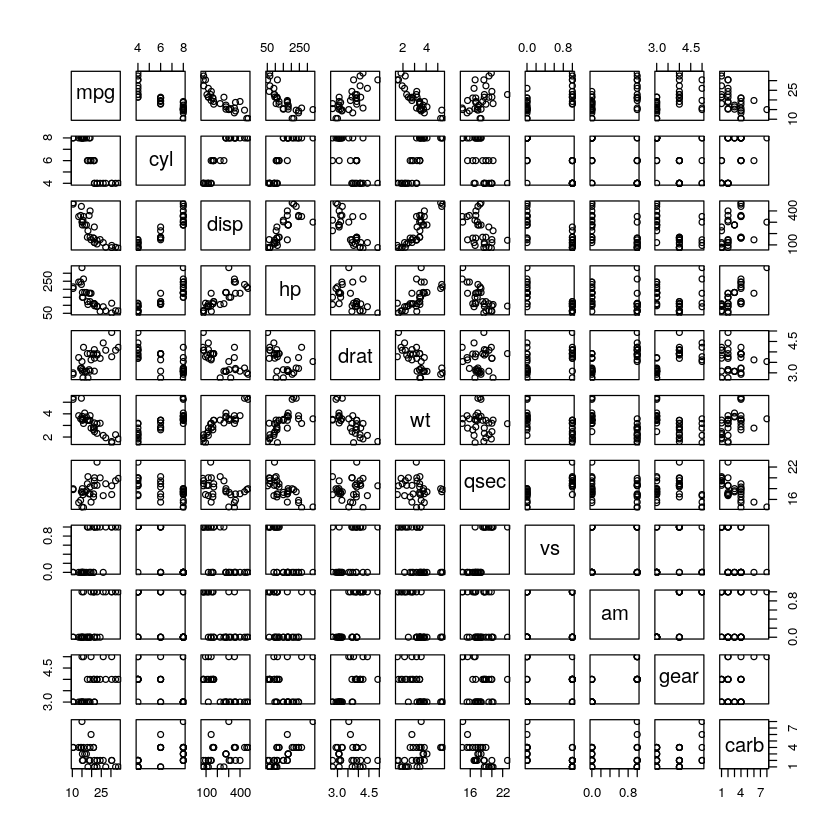

In [40]:
pairs(mtcars)

In [41]:
library(psych)


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [42]:
corr.test(mtcars)

Call:corr.test(x = mtcars)
Correlation matrix 
       mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
mpg   1.00 -0.85 -0.85 -0.78  0.68 -0.87  0.42  0.66  0.60  0.48 -0.55
cyl  -0.85  1.00  0.90  0.83 -0.70  0.78 -0.59 -0.81 -0.52 -0.49  0.53
disp -0.85  0.90  1.00  0.79 -0.71  0.89 -0.43 -0.71 -0.59 -0.56  0.39
hp   -0.78  0.83  0.79  1.00 -0.45  0.66 -0.71 -0.72 -0.24 -0.13  0.75
drat  0.68 -0.70 -0.71 -0.45  1.00 -0.71  0.09  0.44  0.71  0.70 -0.09
wt   -0.87  0.78  0.89  0.66 -0.71  1.00 -0.17 -0.55 -0.69 -0.58  0.43
qsec  0.42 -0.59 -0.43 -0.71  0.09 -0.17  1.00  0.74 -0.23 -0.21 -0.66
vs    0.66 -0.81 -0.71 -0.72  0.44 -0.55  0.74  1.00  0.17  0.21 -0.57
am    0.60 -0.52 -0.59 -0.24  0.71 -0.69 -0.23  0.17  1.00  0.79  0.06
gear  0.48 -0.49 -0.56 -0.13  0.70 -0.58 -0.21  0.21  0.79  1.00  0.27
carb -0.55  0.53  0.39  0.75 -0.09  0.43 -0.66 -0.57  0.06  0.27  1.00
Sample Size 
[1] 32
Probability values (Entries above the diagonal are adjusted for multiple tests.) 

In [68]:
high.corr <- function(x) {
    zero_diag <- function(xx) {
        for (i in 1:nrow(xx)) {
            xx[i, i] = 0
        }
        xx
    }
    
    library('psych')
    
    df <- x
    corrs <- zero_diag(corr.test(df)$r)
    
    answ1 <- max(corrs)
    answ2 <- min(corrs)
    
    res <- ifelse(abs(answ1) > abs(answ2), answ1, answ2)
    
    row.names(which(corrs == res, arr.ind = T))
}

In [69]:
res <- high.corr(swiss)

In [70]:
res

[1] "Education"   "Examination"